importing libraries

In [1]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt 
import numpy as np
import os
import cv2
print(tf.__version__)

2.2.0


In [0]:
mnist=keras.datasets.fashion_mnist
(train_data,train_label),(test_data,test_label)=mnist.load_data()

In [3]:
print(len(train_data))
print(len(test_data))

60000
10000


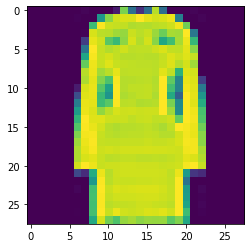

In [4]:
plt.imshow(train_data[500])


normalizing data


In [5]:
train_data=train_data.reshape(60000, 28, 28, 1)
train_data=train_data / 255.0
test_data = test_data.reshape(10000, 28, 28, 1)
test_data=test_data/255.0

model=keras.models.Sequential([
                               keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
                               keras.layers.MaxPool2D(pool_size=(2,2)),
                              
                               
                               keras.layers.Flatten(),
                               keras.layers.Dense(units=64,activation=tf.nn.relu),
                               keras.layers.Dense(units=128,activation=tf.nn.relu),
                               keras.layers.Dense(units=10,activation=tf.nn.softmax)
])

model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                346176    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 356,106
Trainable params: 356,106
Non-trainable params: 0
__________________________________________________

In [6]:
history=model.fit(train_data,train_label,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4270 - accuracy: 0.8459
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2803 - accuracy: 0.8979
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2360 - accuracy: 0.9130
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2050 - accuracy: 0.9246
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1811 - accuracy: 0.9328
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1585 - accuracy: 0.9407
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1380 - accuracy: 0.9481
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1211 - accuracy: 0.9546
Epoch 9/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1071 - accuracy: 0.9600
Epoch 10/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.092

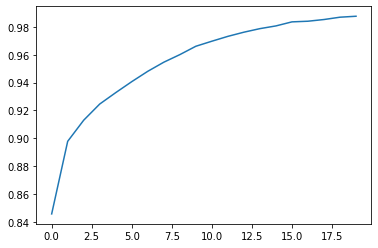

In [7]:
plt.plot(history.history['accuracy'])


In [8]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


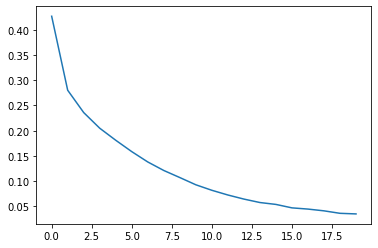

In [9]:
plt.plot(history.history['loss'])

In [10]:
test_loss, test_acc=model.evaluate(test_data, test_label)

313/313 [==============================] - 1s 3ms/step - loss: 0.5798 - accuracy: 0.9089
